<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocess Time Series Data**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Origin: Open Power System Data. You can download the data here. It contains electricity consumption, wind power production, and solar power production for 2006–2017.

In [4]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/energy.csv'
data = pd.read_csv(url)
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


https://link.medium.com/koN6D5zah7

## **Set Date Format**

**Select & rename features and set date index**

In [5]:
# Select specific features, and rename features
series = data[['Date', 'Consumption', 'Wind']].rename(columns={"Date": "date", "Consumption": "load", "Wind" : "wind"})

# Set date index
series = series.set_index('date')

# Visualize
series.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='date', length=4383)

**Convert Datatype into Datetime**

Since the datatype is still dtype='object' and not a datetime, we need to convert it to datetime:

In [6]:
# Set (UTC) date time (UTC means from "2006-01-05" to "2006-01-01 00:00:00+00:00")
series.index = pd.to_datetime(series.index, utc=True)

# Optional: Make naive Datetime time zone aware (turn "2016-11-02 05:00:28" into "2016-11-02 05:00:28+00:00")
# df.index = df.index.tz_localize(tz='UTC')

# Optional: Convert tz-aware Datetime Array/Index from one time zone to another.
# df.index = df.index.tz_convert('US/Central')

# Optional: Sometimes it can be necessary to change time
# df.index = df.index.tz_localize('US/Central', ambiguous='NaT').tz_convert('UTC')
# df.index = df.index + pd.Timedelta(hours=1)

# Visualize
series.head()

,load,wind
date,,
2006-01-01 00:00:00+00:00,1069.184,NaN
2006-01-02 00:00:00+00:00,1380.521,NaN
2006-01-03 00:00:00+00:00,1442.533,NaN
2006-01-04 00:00:00+00:00,1457.217,NaN
2006-01-05 00:00:00+00:00,1477.131,NaN


In [0]:
series.index

DatetimeIndex(['2006-01-01 00:00:00+00:00', '2006-01-02 00:00:00+00:00',
               '2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-07 00:00:00+00:00', '2006-01-08 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=4383, freq=None)

**Add Frequency (optional)**

Now dtype='datetime64[ns, UTC]', but freq=None. It is not known if data is collected by the hour, by day, my minute, etc. We can set the frequency (Available frequencies in pandas include hourly (‘H’), calendar daily (‘D’), business daily (‘B’), weekly (‘W’), monthly (‘M’), quarterly (‘Q’), annual (‘A’), and many others.)

In [0]:
series = series.asfreq('D')
series.index

DatetimeIndex(['2006-01-01 00:00:00+00:00', '2006-01-02 00:00:00+00:00',
               '2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-07 00:00:00+00:00', '2006-01-08 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=4383, freq='D')

## **Data Imputation**

**Check for missing data**

In [0]:
series.apply(lambda x: sum(x.isnull()),axis=0) 
# series.isnull().sum() # Alternative

load       0
wind    1463
dtype: int64

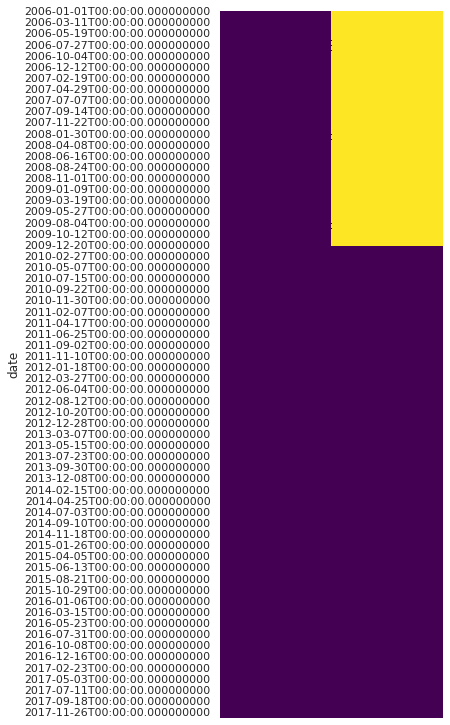

In [0]:
sns.set(rc={'figure.figsize':(4, 13)})
sns.heatmap(series.isnull(),xticklabels=False,cbar=False,cmap='viridis')

This means there are no data for wind until the end of 2009.

**Also let's check if there are any zero values?** That can sometimes be wrong.

In [0]:
(series[series == 0.00]).count()

load    0
wind    0
dtype: int64

**Impute Missing Data**

In case, some days are missing in our data, the above code is going to insert empty rows and in each of these rows the values corresponding to the columns would be all NaNs. In order to avoid these NaN values, we can tell as.freq function how to fill these null values

There are two ways to do that:
* **Forward fill**: use it for example for filling minutes in hour-beginning data (e.g. 6:00 am price is valid from 6:00 am until 6:59 am).
* **Backward fill**: use it for example for filling minutes in hour-ending data (e.g. 6:00 am price is valid from 5:01 am until 6:00 am).

> Replacing missing data with medians or means in not such a good idea when it comes to time-series data. Better alternatives exist such as forward filling, backward filling, linear interpolation, mean of nearest neighbours, etc.

In [0]:
ffill = series['2013-02-03':'2013-02-28']
ffill = ffill[['wind']]
# In case we would have NaN on day 2013-02-04, it would impute the previous day's value
ffill = ffill.asfreq('D', method = 'ffill')
ffill.head()

,wind
date,
2013-02-03 00:00:00+00:00,251.234
2013-02-04 00:00:00+00:00,370.033
2013-02-05 00:00:00+00:00,295.974
2013-02-06 00:00:00+00:00,100.776
2013-02-07 00:00:00+00:00,53.560


This technique of forward filling makes sense on some level — if we are not aware of the amount of power consumption on today’s date, we can always assume it is the same as it was yesterday.

## **Resampling**

**Upsample Datetime Data**

* We can resample from day to week W, quarter Q, month M or year Y etc.
* We can resample by choosing the max value, the mean value etc.

In [0]:
data_yearly_max = series[['load']].resample('Y').max()
data_yearly_max.head()

,load
date,
2006-12-31 00:00:00+00:00,1613.312
2007-12-31 00:00:00+00:00,1644.873
2008-12-31 00:00:00+00:00,1606.299
2009-12-31 00:00:00+00:00,1538.894
2010-12-31 00:00:00+00:00,1709.568


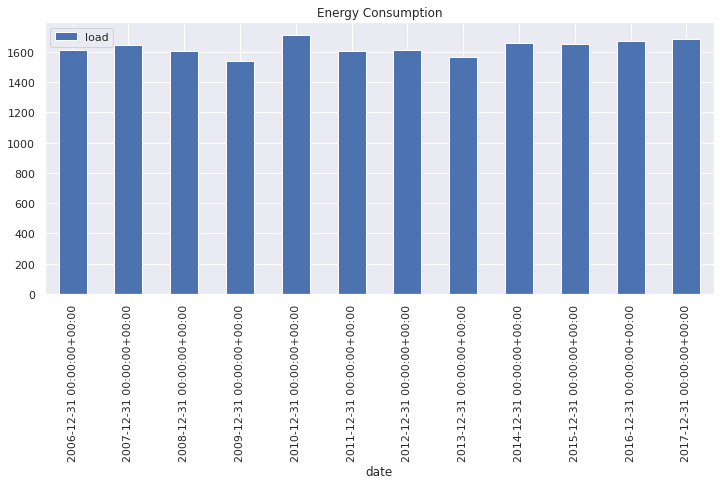

In [0]:
# Visualize resampled data
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
data_yearly_max.plot(title='Energy Consumption', kind='bar')

**Downsample Datetime Data**

Now let's turn the daily load (demand / power consumption) data into hourly intervalls. We assume that data is hour-beginning. In this case we need to apply forwardfill operator:

In [0]:
# Select feature for resampling (optional)
downsample = series[['load']]
downsample.head()

,load
date,
2006-01-01 00:00:00+00:00,1069.184
2006-01-02 00:00:00+00:00,1380.521
2006-01-03 00:00:00+00:00,1442.533
2006-01-04 00:00:00+00:00,1457.217
2006-01-05 00:00:00+00:00,1477.131


In [0]:
# Resample to hourly intervall, using backfill and set limit 23 hours
downsample = downsample.resample('h', label='right', closed='right').mean().ffill(limit=23)

# Optional: Divide by 12 to turn from MW to MWh
# downsample = downsample.div(12)

# Visualize
downsample.head(28)

,load
date,
2006-01-01 00:00:00+00:00,1069.184
2006-01-01 01:00:00+00:00,1069.184
2006-01-01 02:00:00+00:00,1069.184
2006-01-01 03:00:00+00:00,1069.184
2006-01-01 04:00:00+00:00,1069.184
2006-01-01 05:00:00+00:00,1069.184
2006-01-01 06:00:00+00:00,1069.184
2006-01-01 07:00:00+00:00,1069.184
2006-01-01 08:00:00+00:00,1069.184


We can do the same with hourly data turning into 5 or 15 minutes intervalls. Please note the different limits:

* df.resample('5min', label='right', closed='right').mean().ffill(limit=11)

* df.resample('15min', label='right', closed='right').mean().ffill(limit=3)

## **Bin & Group**

Show wind distribution to determine bin size

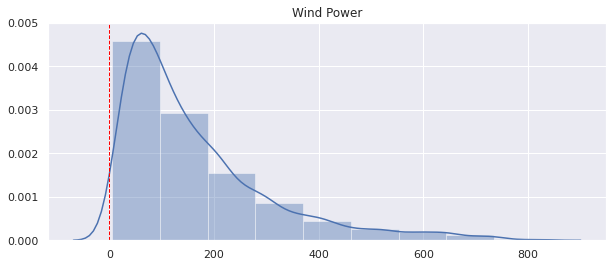

In [8]:
df = series[['wind']]
sns.set(rc={'figure.figsize':(10, 4)})
sns.distplot((df), hist=True, rug=False, bins=9).set_title('Wind Power')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

Bin and group data and plot against each other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


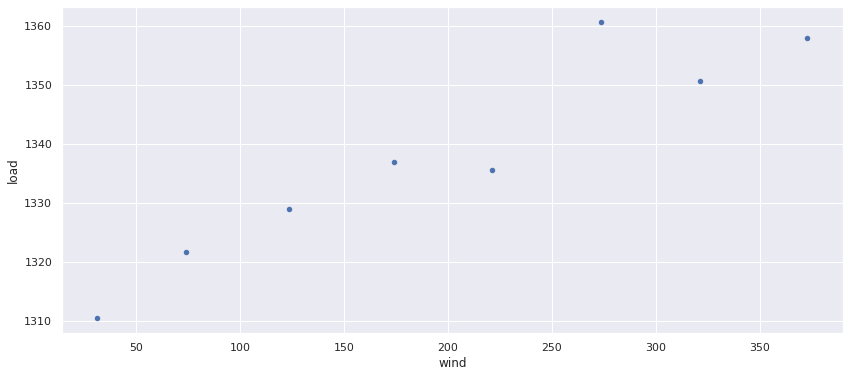

In [26]:
# Select features and set limit (optional)
df = series[['load', 'wind']].where(series['load'] < 1600)

# Determine bins based on distribution analysis
bins = [0.0, 50, 100, 150, 200, 250, 300, 350, 400]
labels = [1,2,3,4,5,6,7,8]

# Create bins based on bins and labels
df['binned'] = pd.cut(df['wind'], bins=bins, labels=labels)

# Groupby bins, call mean value in each bin and display as scatterplot
df.groupby(pd.cut(df['wind'], bins=bins)).mean().plot.scatter('wind', 'load')

In [21]:
# Show bins as table
s = pd.cut(df['wind'], bins=bins).value_counts()
s

(50.0, 100.0]     688
(0.0, 50.0]       530
(100.0, 150.0]    463
(150.0, 200.0]    336
(200.0, 250.0]    224
(250.0, 300.0]    168
(300.0, 350.0]    108
(350.0, 400.0]     81
Name: wind, dtype: int64

## **Merge Tables & Add Derivatives**

This doesn't necessarily make sense. The additional Google stock price data are just for a code demonstration.

**Load another table with daily stock data from Google**

In [0]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/google.csv'
data = pd.read_csv(url)
google = data[['Date', 'Close']].rename(columns={"Date": "date", "Close": "price"}).set_index('date')
google.index = pd.to_datetime(google.index, utc=True)
google.head()

,price
date,
2010-02-01 00:00:00+00:00,265.514771
2010-02-02 00:00:00+00:00,264.568329
2010-02-03 00:00:00+00:00,269.400208
2010-02-04 00:00:00+00:00,262.406433
2010-02-05 00:00:00+00:00,264.653015


**Merge both tables**

In [0]:
from functools import reduce
tables = [series, google]
total = reduce(lambda left,right: pd.merge(left,right,on='date'), tables)
total = total.dropna()
total.head()

,load,wind,price
date,,,
2010-02-01 00:00:00+00:00,1536.453,151.409,265.514771
2010-02-02 00:00:00+00:00,1607.625,316.688,264.568329
2010-02-03 00:00:00+00:00,1585.581,225.569,269.400208
2010-02-04 00:00:00+00:00,1521.671,82.257,262.406433
2010-02-05 00:00:00+00:00,1509.085,141.031,264.653015


**Add Derivatives**

In [0]:
# Add delta between load and wind (Take absolute values of delta and round percentage values)
total['delta'] = (total['load'] - total['wind']).abs().round(2)
total['percent'] = ((total['delta'] / total['load'])*(100)).round(2)
total = total.sort_values(by='delta', ascending=False)
total.head()

,load,wind,price,delta,percent
date,,,,,
2017-01-24 00:00:00+00:00,1682.002,31.375,823.869995,1650.63,98.13
2017-01-23 00:00:00+00:00,1663.492,39.710,819.309998,1623.78,97.61
2014-12-03 00:00:00+00:00,1649.827,26.247,529.865234,1623.58,98.41
2015-01-20 00:00:00+00:00,1629.730,16.737,505.512115,1612.99,98.97
2015-02-04 00:00:00+00:00,1651.314,40.218,521.328674,1611.10,97.56


**Query Table**

In [0]:
total.max()

load       1709.568000
wind        826.278000
price      1077.140015
delta      1650.630000
percent      99.550000
dtype: float64

We can see the max value for delta was 1650.63. Now we want to know, how many times it was larger than X:

In [0]:
# How many times went the delta was larger than 1500?
"In %s%% of all days the price delta was > 1500" % np.int_(len(total.loc[total.delta > 1500]) / len((total.delta)) * 100)

'In 3% of all days the price delta was > 1500'

**Remove added Columns**

In [0]:
total = total.drop(columns=['delta', 'percent']).sort_index(ascending=True)
total.head()

,load,wind,price
date,,,
2010-02-01 00:00:00+00:00,1536.453,151.409,265.514771
2010-02-02 00:00:00+00:00,1607.625,316.688,264.568329
2010-02-03 00:00:00+00:00,1585.581,225.569,269.400208
2010-02-04 00:00:00+00:00,1521.671,82.257,262.406433
2010-02-05 00:00:00+00:00,1509.085,141.031,264.653015


## **Normalize or Standardize**

* Normalization (feature rescaling): data values between 0 and 1.
* Normalization is used when distribution of data is unknown or not Gaussian, and the algorithm does not make assumptions about data distribution (k-nearest neighbors or neural nets). Different formula. One way:

> $x_{n e w}=\frac{x-x_{m i n}}{x_{m a x}-x_{m i n}}$


* Standardization (z-score or t-score): transforms data to have a mean of zero and a standard deviation of 1. z-score is number of standard deviations from mean (e.g. score of 2 is 2 std above mean).
* Standardization assumes Gaussian distribution (not strictly true, but more effective). and the algorithm assumes Gaussian distribution (linear regression, logistic regression, linear discriminant analysis).

> $z_{i}=\frac{x_{i}-\bar{x}}{s}$

**Apply min max scaler (normalize)**

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax = series.copy()
scaler = MinMaxScaler(feature_range=(0,1))
minmax = scaler.fit_transform(minmax)
minmax

array([[0.26152682,        nan],
       [0.62055207,        nan],
       [0.6920626 ,        nan],
       ...,
       [0.52203255, 0.70506422],
       [0.43019555, 0.87199474],
       [0.30526767, 0.87190821]])

**Exkurs: Reformat into pandas dataframe (and round numbers)**

In [0]:
minmax = pd.DataFrame (minmax, columns = ['load', 'wind']).round(2)
minmax.head()

,load,wind
0,0.26,NaN
1,0.62,NaN
2,0.69,NaN
3,0.71,NaN
4,0.73,NaN


**Divide by max value ever seen in series**

In [0]:
total = series.apply(lambda x: x/x.cummax(), axis=0)
total = total.dropna()
total.describe()

,load,wind
count,2920.000000,2920.000000
mean,0.789431,0.276189
std,0.097546,0.216730
min,0.526348,0.012313
25%,0.716935,0.113586
50%,0.808642,0.212297
75%,0.856170,0.376214
max,1.000000,1.000000


## **Filter & Visualize**

**Filter specific data**

In [0]:
# Find top 8 data (first filter feature, then check for largest value)
df = series[['load']].nlargest(8, 'load').round(2)
df.head()

,load
date,
2010-12-01 00:00:00+00:00,1709.57
2017-01-24 00:00:00+00:00,1682.00
2017-01-25 00:00:00+00:00,1674.17
2016-01-19 00:00:00+00:00,1672.32
2016-12-07 00:00:00+00:00,1671.13


**Visualize specific features**

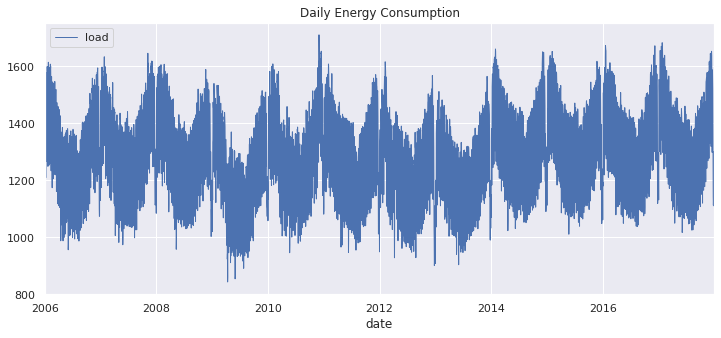

In [0]:
# Optional: Select on feature to visualize
load = series[['load']]

# Visualize Series
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
load.plot(title='Daily Energy Consumption')

**Select specific data range in time series**

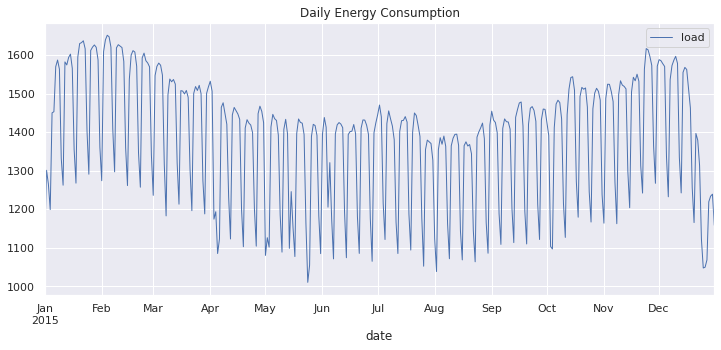

In [0]:
# Optional: Select specific data range
load_2015 = load['2015-01-01':'2015-12-31']

# Visualize Series
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
load_2015.plot(title='Daily Energy Consumption')

## **Appendix**

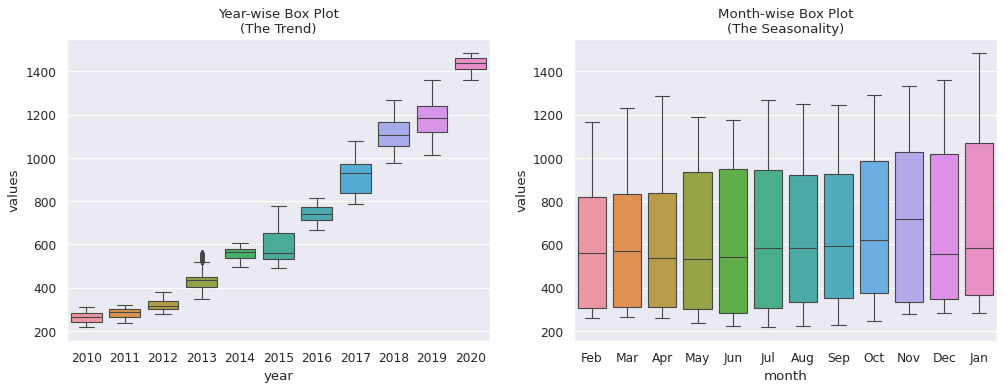

In [0]:
# Trend and Seasonality Test
seasonal_plots = series.copy()
seasonal_plots.reset_index(inplace=True)

# Prepare data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi= 80)
sns.boxplot(x='year', y='values', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='values', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
plt.show()